## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [ ]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostRegressor


In [ ]:
df = pd.read_csv('https://res.cloudinary.com/dmqus2vrc/raw/upload/v1713549322/stud_d21onz.csv')

#### Show Top 5 Records

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,revision class,series_1 score,series_2 score,final score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [ ]:
X = df.drop(columns=['final score'],axis=1)

In [ ]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,revision class,series_1 score,series_2 score
0,female,group B,bachelor's degree,standard,none,72,72
1,female,group C,some college,standard,completed,69,90
2,female,group B,master's degree,standard,none,90,95
3,male,group A,associate's degree,free/reduced,none,47,57
4,male,group C,some college,standard,none,76,78


In [ ]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['revision class'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [ ]:
y = df['final score']

In [ ]:
y

0      74
1      88
2      93
3      44
4      75
       ..
995    95
996    55
997    65
998    77
999    86
Name: final score, Length: 1000, dtype: int64

In [ ]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [ ]:
X = preprocessor.fit_transform(X)

In [ ]:
X.shape

(1000, 19)

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3.3779
- Mean Absolute Error: 2.7165
- R2 Score: 0.9498
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.8659
- Mean Absolute Error: 3.1903
- R2 Score: 0.9380


Lasso
Model performance for Training set
- Root Mean Squared Error: 4.5135
- Mean Absolute Error: 3.6478
- R2 Score: 0.9104
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.9256
- Mean Absolute Error: 3.8964
- R2 Score: 0.8993


Ridge
Model performance for Training set
- Root Mean Squared Error: 3.3740
- Mean Absolute Error: 2.7102
- R2 Score: 0.9499
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.8612
- Mean Absolute Error: 3.2005
- R2 Score: 0.9381


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 4.1250
- Mean Absolute Error: 3.3235
- R2 Score: 0.9251
-----------------------

### Results

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.938143
0,Linear Regression,0.937992
7,CatBoosting Regressor,0.916795
5,Random Forest Regressor,0.916103
6,XGBRegressor,0.915462
8,AdaBoost Regressor,0.908268
1,Lasso,0.899336
3,K-Neighbors Regressor,0.881183
4,Decision Tree,0.863578


## Linear Regression

In [ ]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 93.80


In [ ]:
print(X_test);

[[ 1.          0.          0.         ...  1.          1.64369407
   1.15336989]
 [ 1.          0.          0.         ...  0.         -0.86364705
  -0.21716055]
 [ 0.          1.          0.         ...  1.          0.9178848
   0.26252511]
 ...
 [ 1.          0.          0.         ...  1.          0.52198883
   0.81073728]
 [ 1.          0.          0.         ...  1.         -0.07185512
   0.53663119]
 [ 1.          0.          0.         ...  0.         -0.33578576
   0.33105163]]


In [ ]:
X_test[0]

array([1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 1.64369407, 1.15336989])

## Plot y_pred and y_test

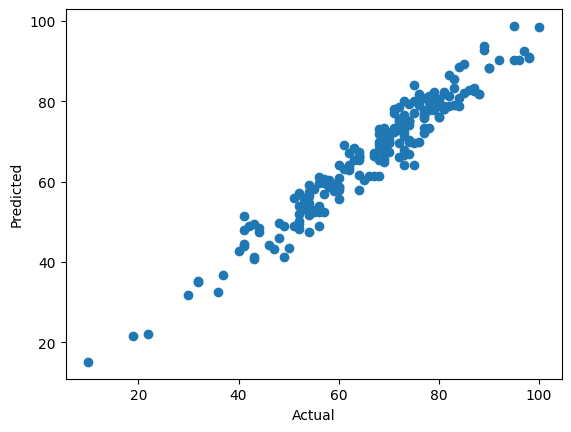

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

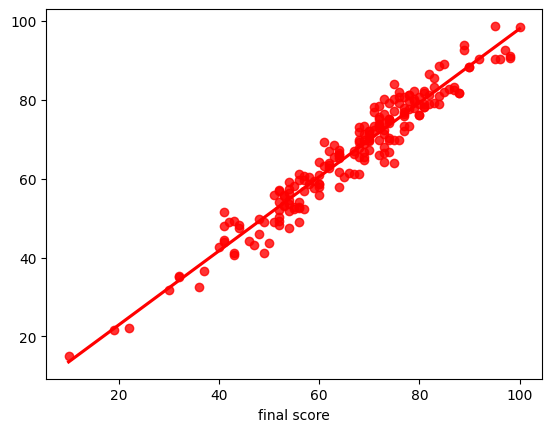

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,84,88.5625,-4.5625
737,73,66.6250,6.3750
740,72,73.5625,-1.5625
660,73,71.3125,1.6875
411,78,79.7500,-1.7500
...,...,...,...
408,56,61.2500,-5.2500
332,53,55.8750,-2.8750
208,76,79.1875,-3.1875
613,74,75.0625,-1.0625
